First few rows of the dataset:


,Merch,Comment/Material Code,Product Family,Single/ Staggered,Fleece,Block cut,Vlok,Estimated Volume for the Season,Manual Efficiency Override,Production Lead Time,Fabric Lead Time,No.of unpaid dev samples,Total Standard Hours,EPH - Reduced SMV,SMV - Reduced,Total Overhead,Overall Efficiency
0,Michelle Athauda,SP22,BODYWEAR,staggered,Y,N,Nike,NaN,NaN,2.111110,59.076887,8.349028,16.991230,26.775043,40.140182,848361.627157,Overall Inefficient
1,Malisha Perera,SP22,BODYWEAR,staggered,N,N,Nike,25469.000000,NaN,44.164576,78.677211,NaN,29.840935,30.953390,55.779246,NaN,Overall Low Efficient
2,Michelle Athauda,SP22,KNIT,single,Y,Y,Nike,22191.240115,NaN,26.521114,67.058489,-0.287035,NaN,21.409417,NaN,NaN,Overall Inefficient
3,Malisha Perera,SP22,KNIT,staggered,Y,Y,Nike,NaN,NaN,18.623385,62.154808,NaN,NaN,22.235804,51.988460,NaN,Overall Inefficient
4,Menasha,SP22,KNIT,single,Y,N,Nike,108471.151605,NaN,28.141218,60.818581,NaN,24.035752,20.359384,54.582755,274363.584860,Overall Inefficient



 'Merch' column separated!

Dataset Info (after removing 'Merch'):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8972 entries, 0 to 8971
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Comment/Material Code            8972 non-null   object 
 1   Product Family                   8972 non-null   object 
 2   Single/ Staggered                8972 non-null   object 
 3   Fleece                           8972 non-null   object 
 4   Block cut                        8972 non-null   object 
 5   Vlok                             8972 non-null   object 
 6   Estimated Volume for the Season  6151 non-null   float64
 7   Manual Efficiency Override       0 non-null      float64
 8   Production Lead Time             8566 non-null   float64
 9   Fabric Lead Time                 8972 non-null   float64
 10  No.of unpaid dev samples         4873 non-null   float64
 11  Total Standard

,0
Comment/Material Code,0
Product Family,0
Single/ Staggered,0
Fleece,0
Block cut,0
Vlok,0
Estimated Volume for the Season,2821
Manual Efficiency Override,8972
Production Lead Time,406
Fabric Lead Time,0


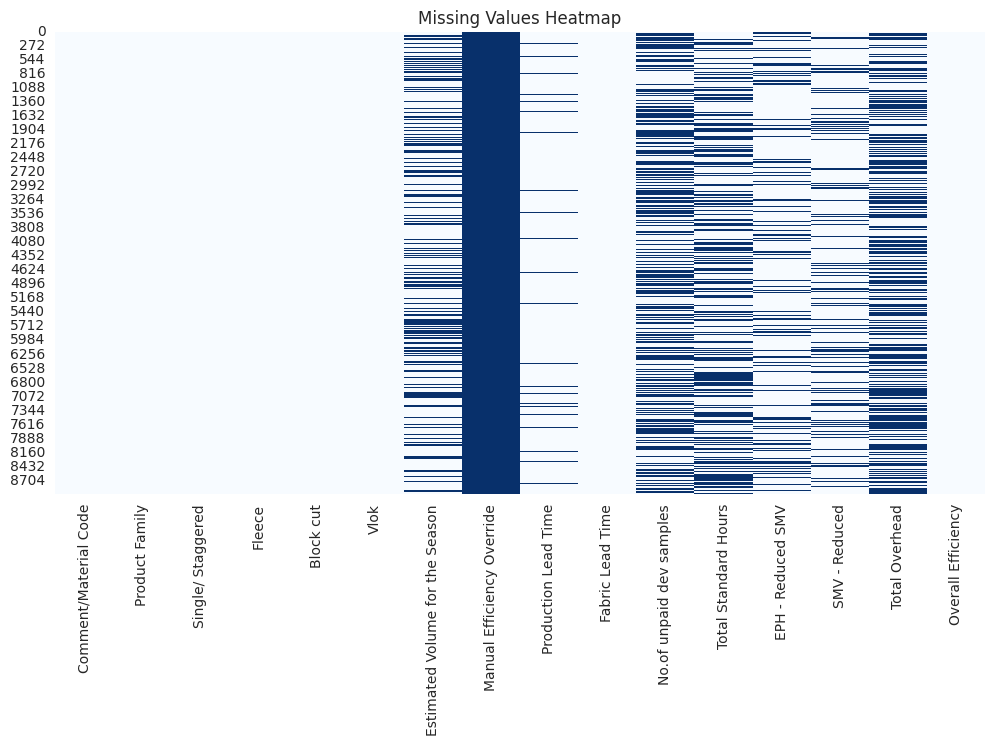

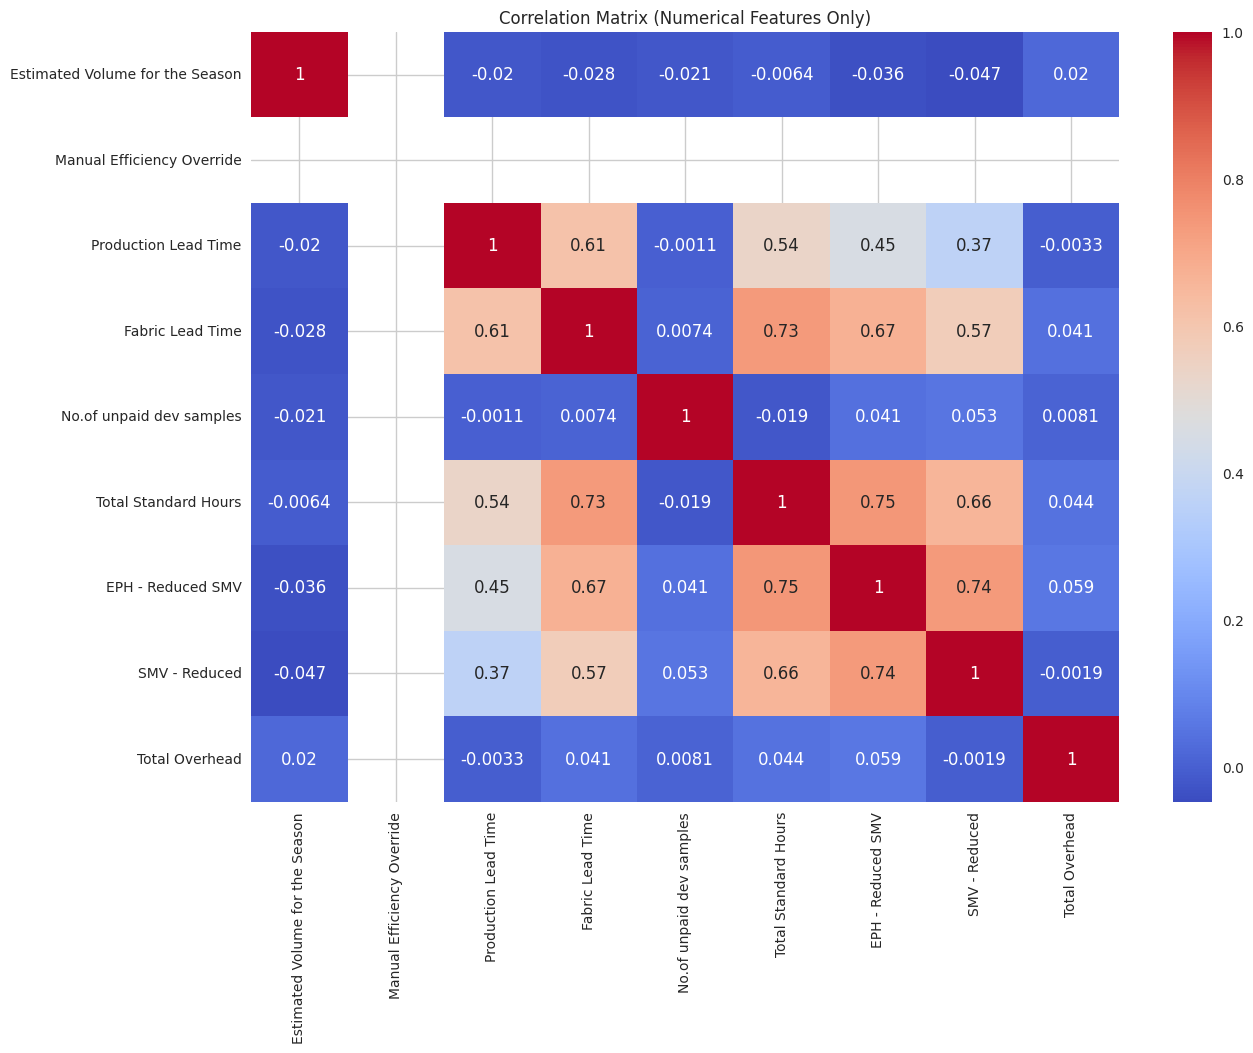

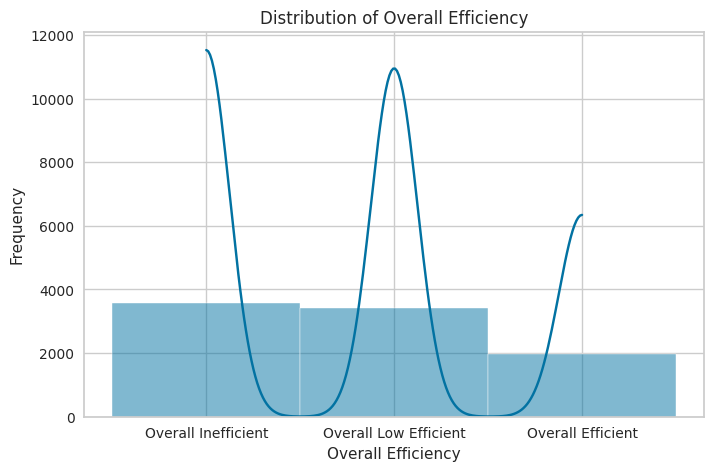

In [ ]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats.mstats import winsorize
import warnings
!pip install pycaret
from pycaret.classification import *

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#  Load the Data
file_path = 'SAP_output_2024_Prod.csv'
df = pd.read_csv(file_path)

# Show first few rows
print("First few rows of the dataset:")
display(df.head())

# Remove 'Merch' column
merch_df = df[['Merch']].copy()   # Save Merch separately
df = df.drop('Merch', axis=1)     # Remove Merch from dataset

print("\n 'Merch' column separated!")

# Basic Info
print("\nDataset Info (after removing 'Merch'):")
df.info()

# Exploratory Data Analysis (EDA)

# Check for duplicate rows
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Check for null values
print("\nNull Values Before Cleaning:")
display(df.isnull().sum())

# Visualize missing data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="Blues")
plt.title("Missing Values Heatmap")
plt.show()

# Correlation Matrix
plt.figure(figsize=(14,10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

# Target Variable Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Overall Efficiency'], kde=True, bins=30)
plt.title("Distribution of Overall Efficiency")
plt.xlabel("Overall Efficiency")
plt.ylabel("Frequency")
plt.show()


In [ ]:

# check missing percentage
missing_percentage = df.isnull().mean() * 100

# Display the result
print(missing_percentage)


Comment/Material Code                0.000000
Product Family                       0.000000
Single/ Staggered                    0.000000
Fleece                               0.000000
Block cut                            0.000000
Vlok                                 0.000000
Estimated Volume for the Season     31.442265
Manual Efficiency Override         100.000000
Production Lead Time                 4.525189
Fabric Lead Time                     0.000000
No.of unpaid dev samples            45.686580
Total Standard Hours                36.034329
EPH - Reduced SMV                   20.686580
SMV - Reduced                       19.683460
Total Overhead                      48.261257
Overall Efficiency                   0.000000
dtype: float64


Missing values after cleaning:
 Comment/Material Code              0
Product Family                     0
Single/ Staggered                  0
Fleece                             0
Block cut                          0
Vlok                               0
Overall Efficiency                 0
Estimated Volume for the Season    0
Production Lead Time               0
Fabric Lead Time                   0
No.of unpaid dev samples           0
Total Standard Hours               0
EPH - Reduced SMV                  0
SMV - Reduced                      0
Total Overhead                     0
dtype: int64


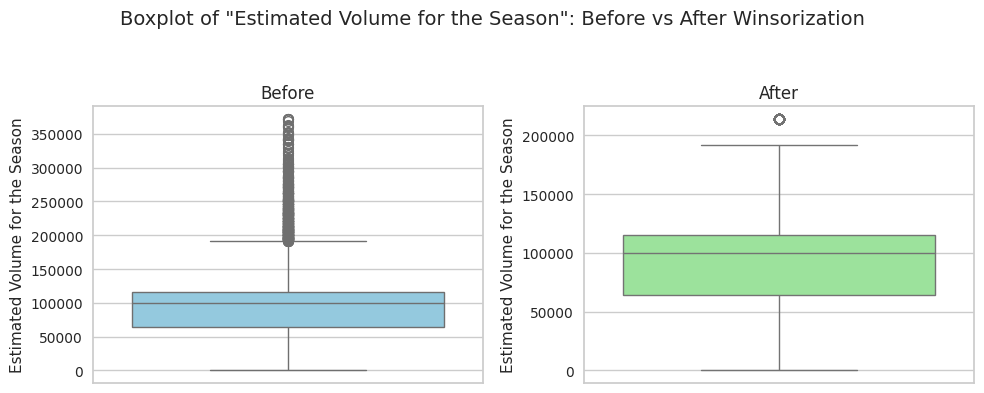

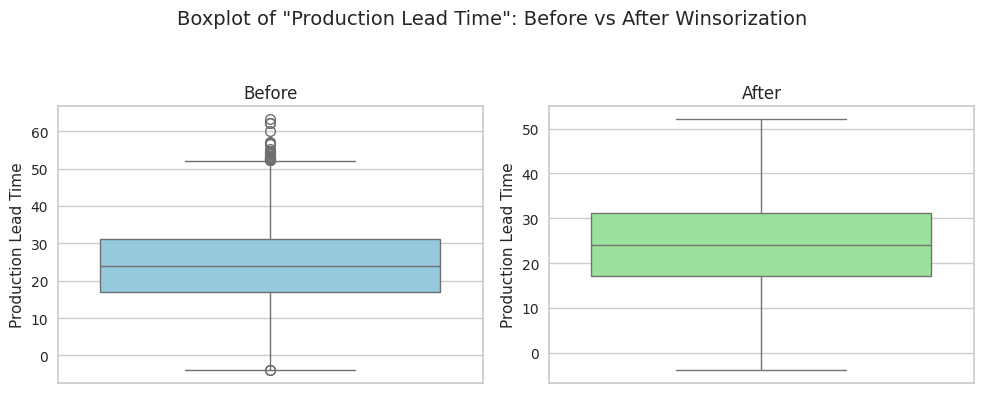

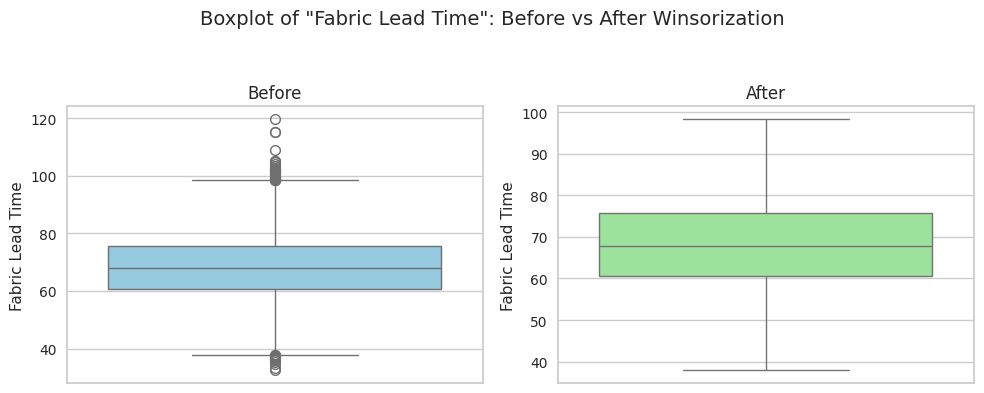

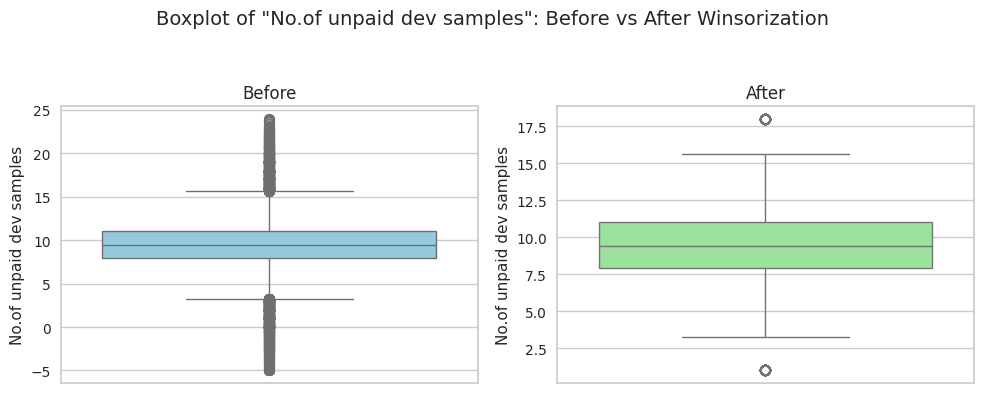

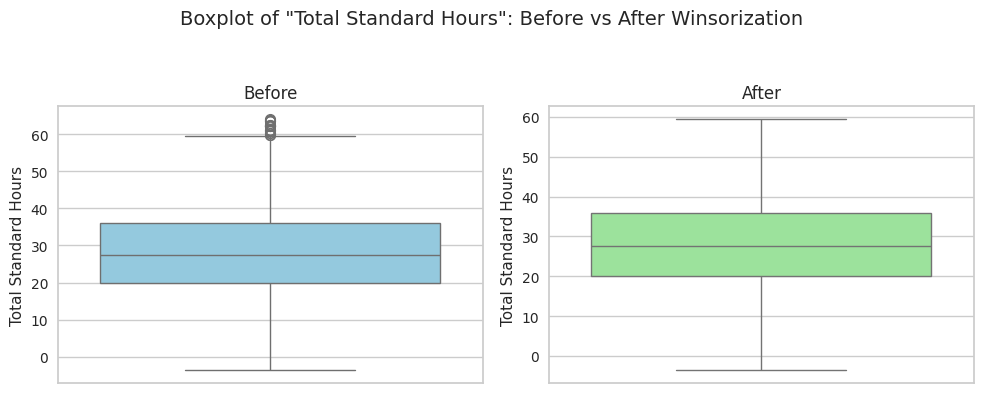

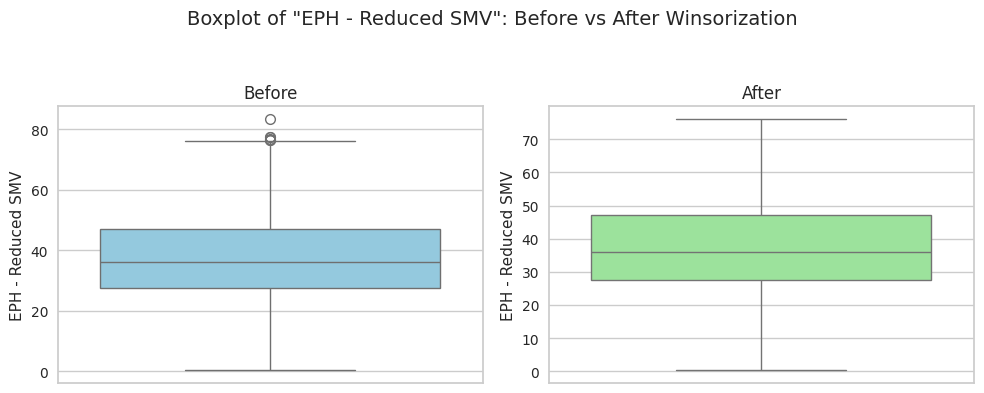

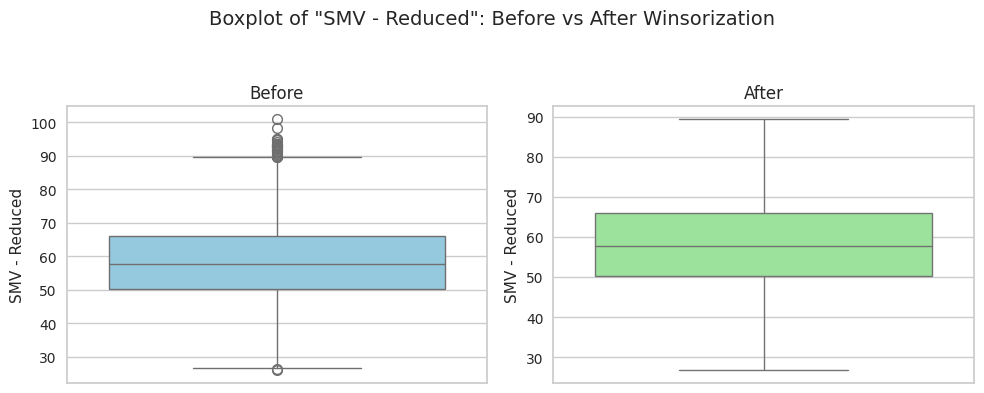

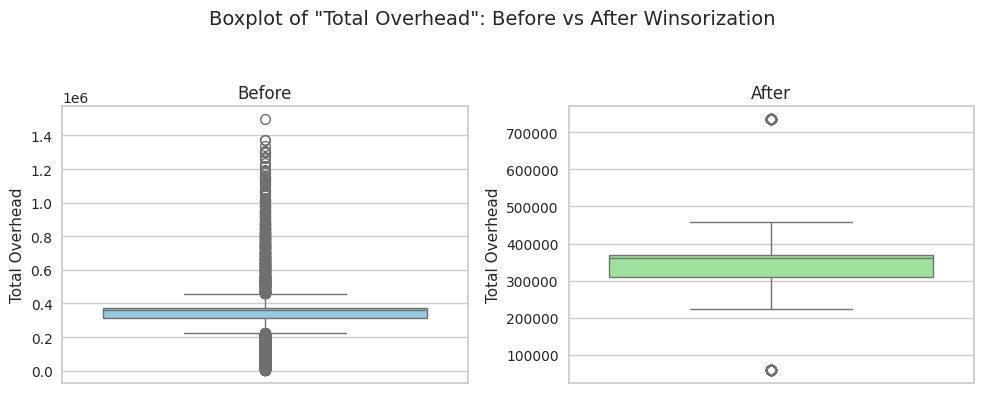

In [ ]:

# Drop columns with all missing values
df = df.dropna(axis=1, how='all')

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply MICE imputation
imputer = IterativeImputer(random_state=42)
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Save copy before Winsorization for plotting
df_numeric_before_winsor = df_numeric_imputed.copy()

# Apply Winsorization after imputing (Outlier Handling)
for col in df_numeric_imputed.columns:
    # Detect IQR-based outliers
    Q1 = df_numeric_imputed[col].quantile(0.25)
    Q3 = df_numeric_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply Winsorization
    lower_cap = df_numeric_imputed[col].quantile(0.05)
    upper_cap = df_numeric_imputed[col].quantile(0.95)
    df_numeric_imputed[col] = np.where(df_numeric_imputed[col] < lower_bound, lower_cap, df_numeric_imputed[col])
    df_numeric_imputed[col] = np.where(df_numeric_imputed[col] > upper_bound, upper_cap, df_numeric_imputed[col])

# Recombine numeric and categorical columns
df_cleaned = pd.concat([df[categorical_cols].reset_index(drop=True),
                        df_numeric_imputed.reset_index(drop=True)], axis=1)

# Check for remaining missing values
print("Missing values after cleaning:\n", df_cleaned.isnull().sum())

# Plot individual boxplots for each column
for col in df_numeric_imputed.columns:
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'Boxplot of "{col}": Before vs After Winsorization', fontsize=14)

    # Before Winsorization
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_numeric_before_winsor[col], color='skyblue')
    plt.title('Before')
    plt.ylabel(col)

    # After Winsorization
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_numeric_imputed[col], color='lightgreen')
    plt.title('After')
    plt.ylabel(col)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


In [ ]:

#Create new features

df_cleaned['StdHr_to_LeadTime'] = df_cleaned['Total Standard Hours'] / (df_cleaned['Production Lead Time'] + 1)

# Efficiency Gap (EPH - SMV)
df_cleaned['Efficiency_Gap'] = df_cleaned['EPH - Reduced SMV'] - df_cleaned['SMV - Reduced']

# Encode Categorical Variables
label_encoders = {}
for col in categorical_cols:
    if col in df_cleaned.columns:
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col])
        label_encoders[col] = le

# Final feature set
X_final = df_cleaned.drop('Overall Efficiency', axis=1)
y_final = df_cleaned['Overall Efficiency']

print("Final feature set shape:", X_final.shape)


Final feature set shape: (8972, 16)


In [ ]:

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_final)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

# Scale the features

scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training Set Shape: (7177, 16)
Test Set Shape: (1795, 16)


In [ ]:

X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

selected_features = [
    'Estimated Volume for the Season',
    'Production Lead Time',
    'Fabric Lead Time',
    'No.of unpaid dev samples',
    'Total Standard Hours',
    'Total Overhead',
    'Product Family',
    'EPH - Reduced SMV',
    'SMV - Reduced',
    'StdHr_to_LeadTime',
    'Efficiency_Gap'
]

X_train_selected = X_train_df[selected_features]

# Combine features + target
train_data = pd.concat([X_train_selected, y_train.reset_index(drop=True)], axis=1)

# Setup PyCaret environment with selected features
clf_setup = setup(data=train_data,
                  target='Overall Efficiency',
                  session_id=42,
                  normalize=False,
                  verbose=False)

#  Compare All Models
best_model = compare_models()

# Create XGBoost Model
xgb_model = create_model('xgboost')

# Tune XGBoost Hyperparameters
tuned_xgb_model = tune_model(xgb_model)

# Evaluate the tuned model (confusion matrix, ROC, etc.)
evaluate_model(tuned_xgb_model)

# inalize the model (ready for deployment)
final_xgb_model = finalize_model(tuned_xgb_model)



# Prepare X_test the same way
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_selected = X_test_df[selected_features]

predictions = predict_model(final_xgb_model, data=X_test_selected)

# View predictions
print(predictions.head())


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8606,0.9609,0.8606,0.8604,0.8603,0.7846,0.7848,0.3070
rf,Random Forest Classifier,0.8594,0.9593,0.8594,0.8603,0.8595,0.7823,0.7826,0.9820
xgboost,Extreme Gradient Boosting,0.8581,0.9594,0.8581,0.8586,0.8580,0.7803,0.7805,0.3850
lightgbm,Light Gradient Boosting Machine,0.8573,0.9614,0.8573,0.8578,0.8573,0.7790,0.7793,2.5910
gbc,Gradient Boosting Classifier,0.8569,0.0000,0.8569,0.8578,0.8569,0.7782,0.7785,2.7730
lr,Logistic Regression,0.8561,0.0000,0.8561,0.8557,0.8554,0.7775,0.7780,0.7910
lda,Linear Discriminant Analysis,0.8551,0.0000,0.8551,0.8545,0.8537,0.7762,0.7773,0.0300
knn,K Neighbors Classifier,0.8083,0.9262,0.8083,0.8074,0.8071,0.7031,0.7038,0.1980
dt,Decision Tree Classifier,0.8053,0.8471,0.8053,0.8058,0.8050,0.6988,0.6993,0.1320
svm,SVM - Linear Kernel,0.8033,0.0000,0.8033,0.8154,0.7926,0.6988,0.7130,0.1040


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.9623,0.8429,0.8434,0.8431,0.7571,0.7571
1,0.8509,0.9525,0.8509,0.8523,0.8509,0.7683,0.7688
2,0.8847,0.9660,0.8847,0.8847,0.8846,0.8222,0.8222
3,0.8785,0.9627,0.8785,0.8795,0.8788,0.8118,0.8120
4,0.8765,0.9748,0.8765,0.8764,0.8765,0.8090,0.8090
5,0.8625,0.9594,0.8625,0.8642,0.8629,0.7865,0.7868
6,0.8307,0.9451,0.8307,0.8310,0.8300,0.7368,0.7376
7,0.8227,0.9458,0.8227,0.8223,0.8224,0.7260,0.7261
8,0.8506,0.9617,0.8506,0.8520,0.8510,0.7695,0.7698


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8549,0.9644,0.8549,0.8555,0.8550,0.7753,0.7754
1,0.8429,0.9544,0.8429,0.8433,0.8427,0.7563,0.7566
2,0.8748,0.9645,0.8748,0.8742,0.8743,0.8068,0.8070
3,0.8765,0.9609,0.8765,0.8769,0.8766,0.8087,0.8087
4,0.8984,0.9711,0.8984,0.9004,0.8989,0.8428,0.8433
5,0.8705,0.9614,0.8705,0.8713,0.8707,0.7991,0.7993
6,0.8367,0.9463,0.8367,0.8365,0.8359,0.7464,0.7471
7,0.8426,0.9437,0.8426,0.8421,0.8421,0.7567,0.7570
8,0.8586,0.9632,0.8586,0.8605,0.8592,0.7815,0.7819


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

   Estimated Volume for the Season  Production Lead Time  Fabric Lead Time  \
0                         1.045943             -1.152450          0.334361   
1                        -0.024220              1.262949         -0.451242   
2                         1.398541             -0.775679         -1.191004   
3                        -1.168344             -0.708663          1.229068   
4                         0.043323             -2.149575         -1.453088   

   No.of unpaid dev samples  Total Standard Hours  Total Overhead  \
0                 -0.004337             -0.402979       -0.382740   
1                 -1.884534              0.038727       -1.512054   
2                 -1.334095             -0.729388        0.028882   
3                  0.479307             -0.079300       -0.373030   
4                  1.377540             -2.548652        0.352820   

   Product Family  EPH - Reduced SMV  SMV - Reduced  StdHr_to_LeadTime  \
0       -0.022182           0.214262      

In [ ]:
# Save the final model
save_model(final_xgb_model, 'xgboost_efficiency_model')



Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Estimated Volume for the Season',
                                              'Production Lead Time',
                                              'Fabric Lead Time',
                                              'No.of unpaid dev samples',
                                              'Total Standard Hours',
                                              'Total Overhead', 'Product Family',
                                              'EPH - Reduced SMV',
                                              'SMV - Reduced',
                                              'StdHr_to_LeadTime',
                                              'Efficiency_Gap'],
                                     transformer=SimpleImputer(add...
                                importance_type=None,
                                interacti

In [ ]:

import xgboost as xgb

# Get the booster from the trained model
booster = xgb_model.get_booster()

# Extract feature importance scores using 'gain'
importance_dict = booster.get_score(importance_type='gain')

# Convert to a DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Gain Importance': list(importance_dict.values())
}).sort_values(by='Gain Importance', ascending=False)

# Reset index for clean display
importance_df.reset_index(drop=True, inplace=True)

# Print the numerical feature importance values
print("Feature Importances (by Gain):")
print(importance_df)


Feature Importances (by Gain):
                            Feature  Gain Importance
0                 EPH - Reduced SMV        13.204682
1              Total Standard Hours         0.724196
2                     SMV - Reduced         0.718942
3                    Efficiency_Gap         0.716805
4                    Total Overhead         0.690924
5   Estimated Volume for the Season         0.683352
6                    Product Family         0.673414
7          No.of unpaid dev samples         0.657667
8              Production Lead Time         0.643620
9                  Fabric Lead Time         0.631639
10                StdHr_to_LeadTime         0.624047


In [ ]:
# Normalize gain values to sum to 1 (percentage)
importance_df['Normalized Gain (%)'] = 100 * (importance_df['Gain Importance'] / importance_df['Gain Importance'].sum())
print(importance_df[['Feature', 'Normalized Gain (%)']])


                            Feature  Normalized Gain (%)
0                 EPH - Reduced SMV            66.124956
1              Total Standard Hours             3.626549
2                     SMV - Reduced             3.600236
3                    Efficiency_Gap             3.589540
4                    Total Overhead             3.459933
5   Estimated Volume for the Season             3.422015
6                    Product Family             3.372246
7          No.of unpaid dev samples             3.293392
8              Production Lead Time             3.223047
9                  Fabric Lead Time             3.163054
10                StdHr_to_LeadTime             3.125032


In [ ]:
# Compare with 'weight'
weight_dict = booster.get_score(importance_type='weight')
weight_df = pd.DataFrame({
    'Feature': list(weight_dict.keys()),
    'Weight': list(weight_dict.values())
}).sort_values(by='Weight', ascending=False)

print(weight_df)


                            Feature  Weight
7                 EPH - Reduced SMV  1063.0
0   Estimated Volume for the Season   979.0
2                  Fabric Lead Time   951.0
10                   Efficiency_Gap   838.0
4              Total Standard Hours   828.0
3          No.of unpaid dev samples   823.0
1              Production Lead Time   810.0
8                     SMV - Reduced   801.0
5                    Total Overhead   743.0
9                 StdHr_to_LeadTime   704.0
6                    Product Family   222.0


In [ ]:
from pycaret.classification import load_model, predict_model


# Load the saved model
loaded_model = load_model('xgboost_efficiency_model')

# Define mappings based on actual product families from dataset
product_family_mapping = {
    'BODYWEAR': 0,
    'KNIT': 1,
    'WOVEN': 2
}
reverse_product_family_mapping = {v: k for k, v in product_family_mapping.items()}

# Define label mapping for model predictions
label_mapping = {
    0: 'Inefficient',
    1: 'Low efficient',
    2: 'Efficient'
}

#  Function to predict and evaluate
def predict_with_rules(model):
    print("\nPlease provide the following input values:")

    # User Inputs (Only main features)
    input_data = {
        'Estimated Volume for the Season': float(input("Estimated Volume for the Season: ")),
        'Production Lead Time': float(input("Production Lead Time: ")),
        'Fabric Lead Time': float(input("Fabric Lead Time: ")),
        'No.of unpaid dev samples': float(input("No.of unpaid dev samples: ")),
        'Total Standard Hours': float(input("Total Standard Hours: ")),
        'Total Overhead': float(input("Total Overhead: "))
    }

    # Product Family input (dropdown)
    print(f"Select Product Family: {', '.join(product_family_mapping.keys())}")
    product_family_input = input("Product Family: ").strip().upper()
    input_data['Product Family'] = product_family_mapping.get(product_family_input)

    #  Auto-fill the  technical columns ---
    input_data['EPH - Reduced SMV'] = round(input_data['Total Standard Hours'] / (input_data['Production Lead Time'] + 1), 2)
    input_data['SMV - Reduced'] = round(input_data['Total Standard Hours'] / 5, 2)
    input_data['StdHr_to_LeadTime'] = round(input_data['Total Standard Hours'] / (input_data['Production Lead Time'] + 1), 2)
    input_data['Efficiency_Gap'] = round(100 - (input_data['Total Standard Hours'] / (input_data['Production Lead Time'] + 1)), 2)

    #  Business Rule Checking
    violations = []

    if input_data['Estimated Volume for the Season'] >= 280000:
        violations.append("Estimated Volume too high (should be < 280000)")

    if input_data['Production Lead Time'] >= 18:
        violations.append("Production Lead Time too long (should be < 18 days)")

    if input_data['Fabric Lead Time'] >= 76:
        violations.append("Fabric Lead Time too long (should be < 76 days)")

    if input_data['No.of unpaid dev samples'] >= 17:
        violations.append("Too many unpaid development samples (should be < 17)")

    if input_data['Total Standard Hours'] >= 70:
        violations.append("Total Standard Hours too high (should be < 70)")

    if input_data['Total Overhead'] >= 550000:
        violations.append("Total Overhead too high (should be < 550000)")

    #  Create DataFrame and Predict
    input_df = pd.DataFrame([input_data])

    # Debugging: print the raw model output
    prediction = predict_model(model, data=input_df)

    model_numeric_output = prediction['prediction_label'][0]
    model_prediction = label_mapping.get(model_numeric_output, "Unknown")

    # Final decision logic
    if len(violations) >= 2:
        final_decision = "Inefficient"
    else:
        final_decision = model_prediction

    # Print Results
    print("\n Model Prediction:", model_prediction)
    print(" Final Decision (after business rules):", final_decision)

    if violations:
        print("\n Issues found:")
        for v in violations:
            print(" -", v)

        print("\n Recommendations:")
        for v in violations:
            if "Estimated Volume" in v:
                print(" ➔ Reduce production volume or split orders into multiple lines.")
            if "Production Lead Time" in v:
                print(" ➔ Improve scheduling, start earlier or speed up approvals.")
            if "Fabric Lead Time" in v:
                print(" ➔ Negotiate with fabric suppliers for faster deliveries.")
            if "unpaid dev samples" in v:
                print(" ➔ Limit development samples to essential ones only.")
            if "Total Standard Hours" in v:
                print(" ➔ Optimize operations, reduce manual tasks, or redesign product.")
            if "Total Overhead" in v:
                print(" ➔ Reassess fixed costs, improve line balancing, and cut wastage.")
    else:
        print("\n No critical issues found. Great job!")

# Run the function
predict_with_rules(loaded_model)


Transformation Pipeline and Model Successfully Loaded

Please provide the following input values:
Estimated Volume for the Season: 100000000000
Production Lead Time: 1
Fabric Lead Time: 1
No.of unpaid dev samples: 1
Total Standard Hours: 1
Total Overhead: 1
Select Product Family: BODYWEAR, KNIT, WOVEN
Product Family: WOVEN



 Model Prediction: Efficient
 Final Decision (after business rules): Efficient

 Issues found:
 - Estimated Volume too high (should be < 280000)

 Recommendations:
 ➔ Reduce production volume or split orders into multiple lines.
